# 1-1 Deep vs Shallow

In [77]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

### Simulate a Function

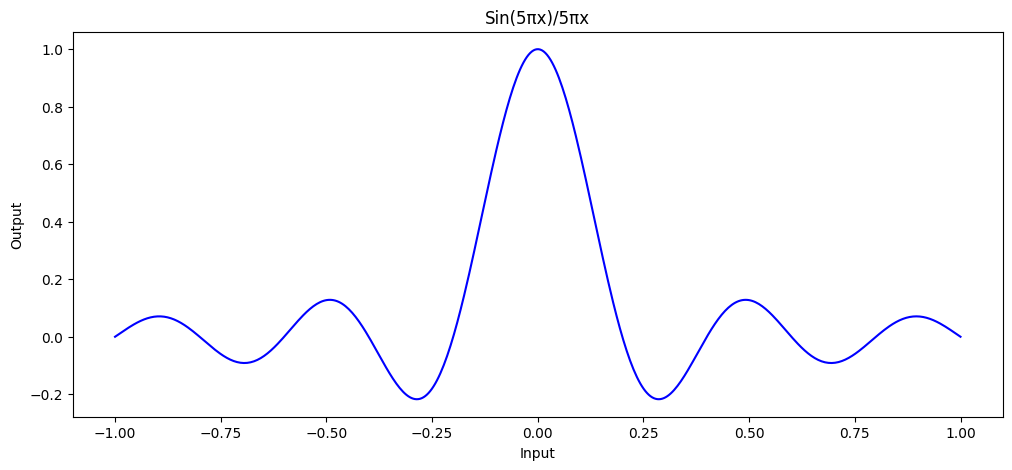

Input shape: torch.Size([500, 1]), 
Output shape: torch.Size([500, 1])


In [78]:
# File directory
OUTPUT_PATH = "files/"

# Set torch seed for repeatable results
torch.manual_seed(1)

# Generate data for the first function
x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)
y = (torch.sin(5 * np.pi * x)) / (5 * np.pi * x)
x, y = x.float(), y.clone().detach().float()

# Visualize the function
plt.figure(figsize=(12, 5))
plt.plot(x.numpy(), y.numpy(), color="blue")
plt.title('Sin(5πx)/5πx')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig(OUTPUT_PATH + 'function_plot.png')
plt.show()

print(f'Input shape: {x.shape}, \nOutput shape: {y.shape}')

In [79]:
# Three DNN Model Definitions as per Instructions
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)
    
    
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 18),
            nn.LeakyReLU(),
            nn.Linear(18, 15),
            nn.LeakyReLU(),
            nn.Linear(15, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.layers(x)
    
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 190)
        self.output = nn.Linear(190, 1)

    def forward(self, x):
        x = F.leaky_relu(self.hidden(x))
        return self.output(x)

In [80]:
# Train and print functions
def train_model(model, x, y, optimizer, loss_fn, max_epochs=20000, convergence_threshold=0.001):
    model.train()
    epochs, losses = [], []
    
    for epoch in range(1, max_epochs + 1):
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epochs.append(epoch)
        losses.append(loss.item())
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}', end='\r')
        
        if epoch > 5 and loss.item() < convergence_threshold:
            if all(abs(losses[-i] - losses[-i+1]) < 1e-5 for i in range(1, 4)):
                print(f"\nConverged at epoch {epoch} with loss {loss.item():.4f}")
                break
    
    return epochs, losses, pred

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

def print_model_params(model, stage):
    print(f"\nModel parameters {stage} training:")
    for name, param in model.state_dict().items():
        print(f"{name}: {param}")

Total parameters in Model0: 571

Model parameters before training:
layers.0.weight: tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
layers.0.bias: tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
layers.2.weight: tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
layers.2.bias: tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
layers.4.weight: tensor([[ 0.1720, -0.0742,  0.1545,  0.0180,

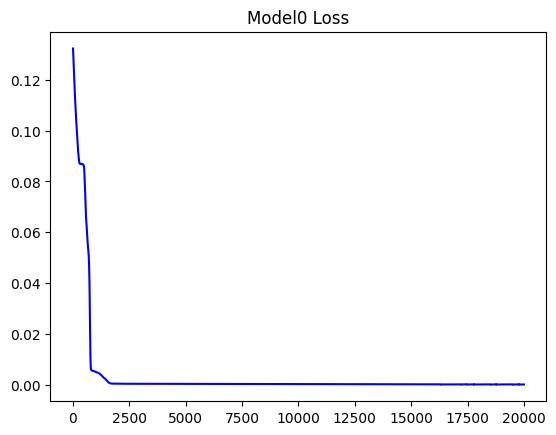

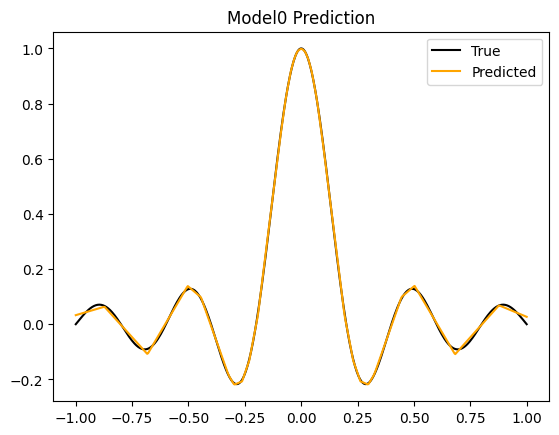

In [81]:
net1 = Model0()
optimizer = torch.optim.Adam(net1.parameters(), lr=0.0005, weight_decay=1e-4)
loss_fn = nn.MSELoss()

print(f"Total parameters in Model0: {count_parameters(net1)}")
print_model_params(net1, "before")

epochs1, losses1, pred1 = train_model(net1, x, y, optimizer, loss_fn)
print_model_params(net1, "after")

plt.plot(epochs1, losses1, color="blue")
plt.title('Model0 Loss')
plt.show()

plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x, pred1.detach().numpy(), color="orange", label="Predicted")
plt.title('Model0 Prediction')
plt.legend()
plt.savefig(OUTPUT_PATH + 'model0_prediction')
plt.show()

Total parameters in Model1: 572

Model parameters before training:
layers.0.weight: tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
layers.0.bias: tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
layers.2.weight: tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
         -0.1913, -0.0270],
        [-0.1009,  0.2349,  0.2570,  0.20

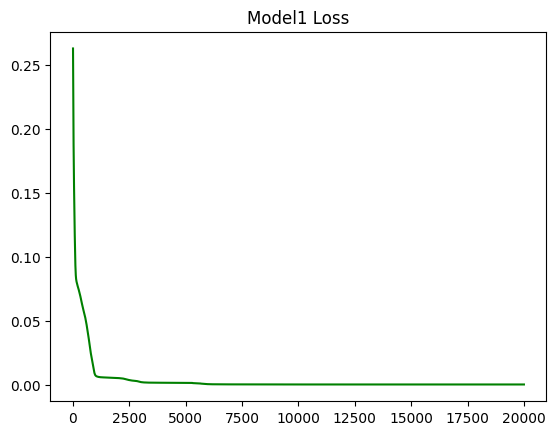

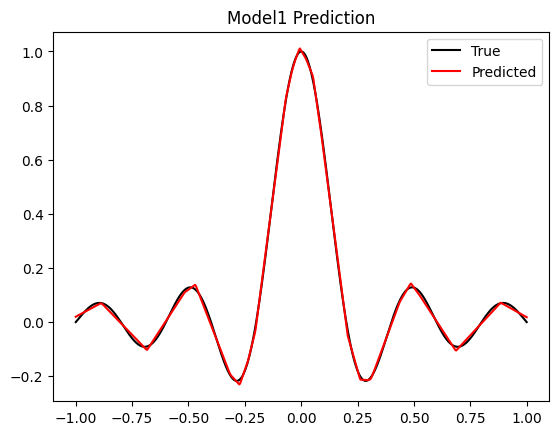

In [82]:
net2 = Model1()
optimizer = torch.optim.Adam(net2.parameters(), lr=0.0005, weight_decay=1e-4)

print(f"Total parameters in Model1: {count_parameters(net2)}")
print_model_params(net2, "before")

epochs2, losses2, pred2 = train_model(net2, x, y, optimizer, loss_fn)
print_model_params(net2, "after")

plt.plot(epochs2, losses2, color="green")
plt.title('Model1 Loss')
plt.show()

plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x, pred2.detach().numpy(), color="red", label="Predicted")
plt.title('Model1 Prediction')
plt.legend()
plt.savefig(OUTPUT_PATH + 'model1_prediction')
plt.show()

Total parameters in Model2: 571

Model parameters before training:
hidden.weight: tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.4883],
        [ 0.6254],
        [ 0.1418],
        [ 0.8613],
      

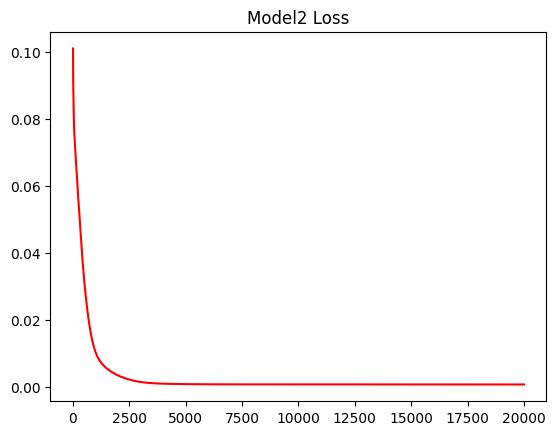

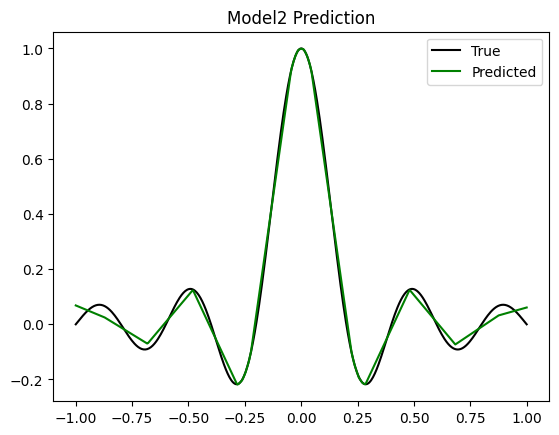

In [83]:
net3 = Model2()
optimizer = torch.optim.Adam(net3.parameters(), lr=0.0005, weight_decay=1e-4)

print(f"Total parameters in Model2: {count_parameters(net3)}")
print_model_params(net3, "before")

epochs3, losses3, pred3 = train_model(net3, x, y, optimizer, loss_fn)
print_model_params(net3, "after")

plt.plot(epochs3, losses3, color="red")
plt.title('Model2 Loss')
plt.show()

plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x, pred3.detach().numpy(), color="green", label="Predicted")
plt.title('Model2 Prediction')
plt.legend()
plt.savefig(OUTPUT_PATH + 'model2_prediction')
plt.show()

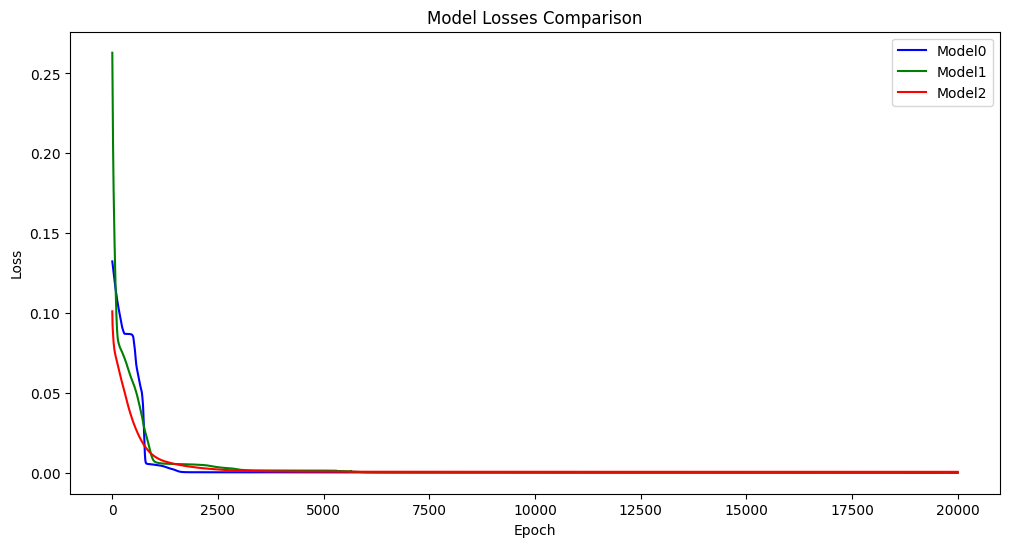

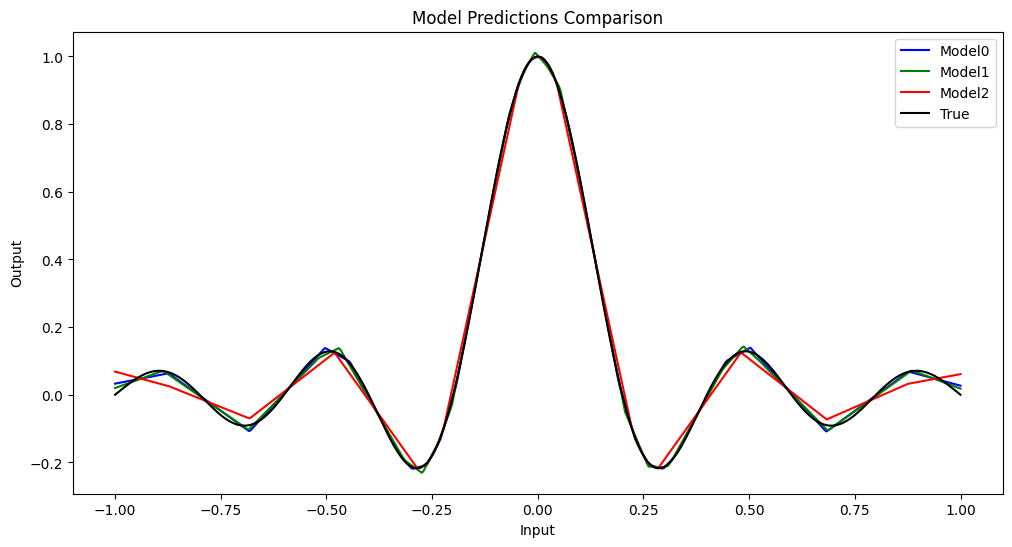

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(epochs1, losses1, color="blue", label="Model0")
plt.plot(epochs2, losses2, color="green", label="Model1")
plt.plot(epochs3, losses3, color="red", label="Model2")
plt.title('Model Losses Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(OUTPUT_PATH + 'loss_comparison.pdf')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x, pred1.detach().numpy(), color="blue", label="Model0")
plt.plot(x, pred2.detach().numpy(), color="green", label="Model1")
plt.plot(x, pred3.detach().numpy(), color="red", label="Model2")
plt.plot(x, y.numpy(), color="black", label="True")
plt.title('Model Predictions Comparison')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.savefig(OUTPUT_PATH + 'prediction_comparison.pdf')
plt.show()

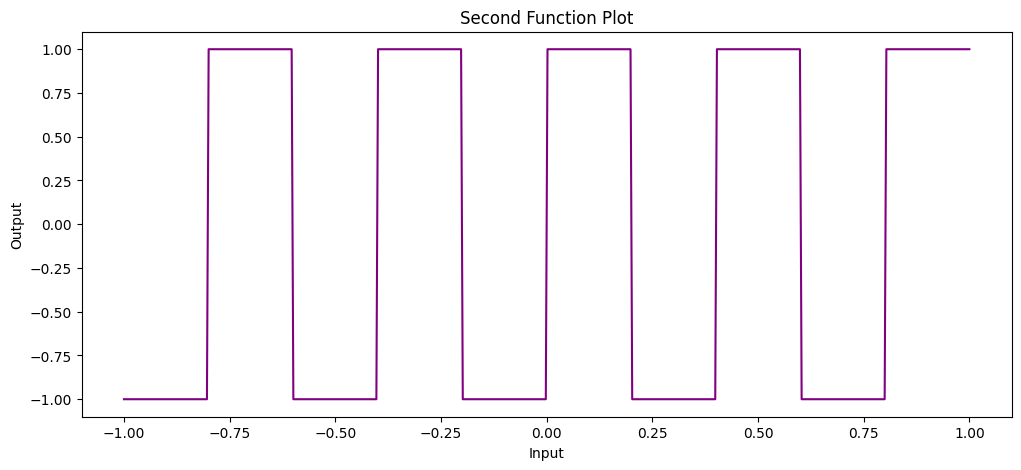

In [85]:
# Generate data for the second function
x_new = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)
y_new = torch.sign(torch.sin(5 * np.pi * x_new)).float()

plt.figure(figsize=(12, 5))
plt.plot(x_new.numpy(), y_new.numpy(), color='purple')
plt.title('Second Function Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig(OUTPUT_PATH + 'second_function_plot.png')
plt.show()

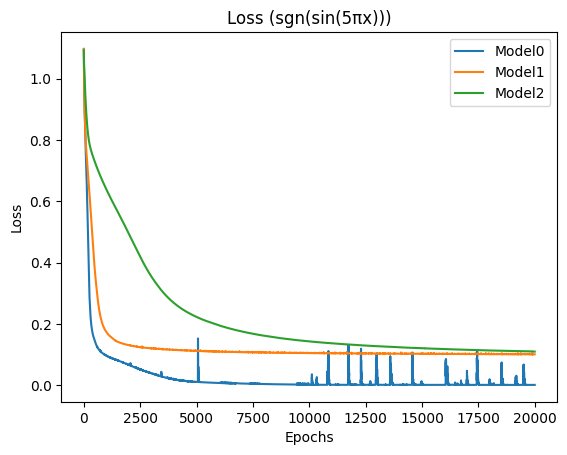

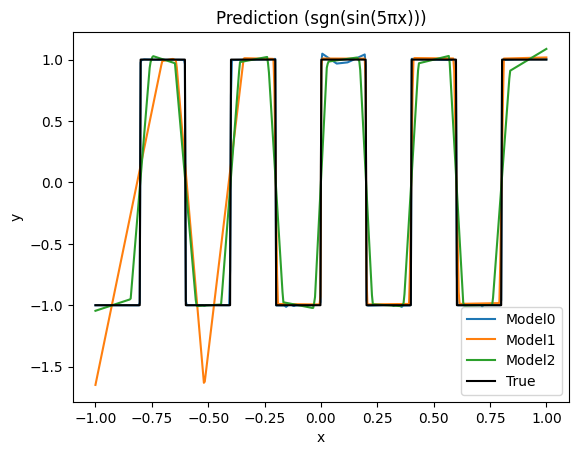

Model0 - Final epoch: 20000, Final loss: 0.000681
Model1 - Final epoch: 20000, Final loss: 0.100536
Model2 - Final epoch: 20000, Final loss: 0.109394


In [86]:
# Train models on the new function
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

final_epochs = []
final_losses = []

for i, net in enumerate([net1, net2, net3], 1):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0005, weight_decay=1e-4)
    epochs, losses, pred = train_model(net, x_new, y_new, optimizer, loss_fn)
    ax1.plot(epochs, losses, label=f'Model{i-1}')
    ax2.plot(x_new.numpy(), pred.detach().numpy(), label=f'Model{i-1}')
    
    final_epochs.append(epochs[-1])
    final_losses.append(losses[-1])

ax1.set_title('Loss (sgn(sin(5πx)))')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(x_new.numpy(), y_new.numpy(), color="black", label="True")
ax2.set_title('Prediction (sgn(sin(5πx)))')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

# Display the plots
plt.show()

# Display final epochs and losses
for i, (epoch, loss) in enumerate(zip(final_epochs, final_losses), 1):
    print(f"Model{i-1} - Final epoch: {epoch}, Final loss: {loss:.6f}")

### Train on Actual Tasks

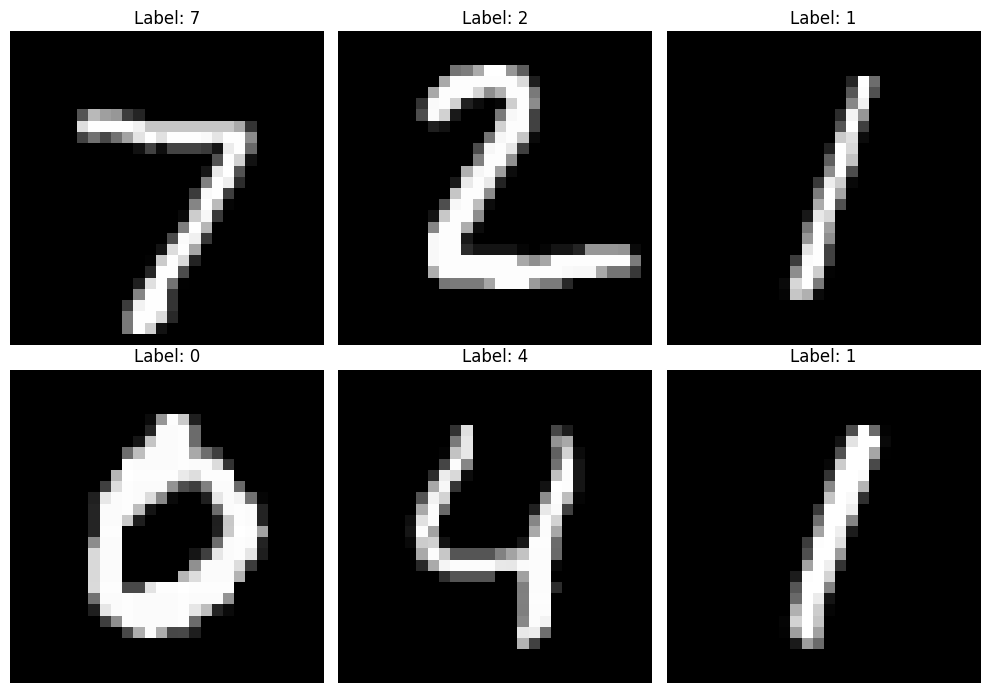

In [87]:
# Load and prepare MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Visualize sample data
sample_data, sample_targets = next(iter(test_loader))
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_data[i][0], cmap='gray')
    ax.set_title(f"Label: {sample_targets[i]}")
    ax.axis('off')
plt.tight_layout()
plt.savefig(OUTPUT_PATH + 'MNISTdata.png')
plt.show()

In [88]:
# Model Definitions
class CNN0(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 4)
        self.conv2 = nn.Conv2d(10, 20, 4)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 4)
        self.conv2 = nn.Conv2d(10, 20, 4)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 40)
        self.fc4 = nn.Linear(40, 30)
        self.fc5 = nn.Linear(30, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    

class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15 * 4 * 4, 86)
        self.fc2 = nn.Linear(86, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 15 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [89]:
def train_cnn(model, num_epochs, train_loader, optimizer, criterion):
    model.train()
    train_losses, train_accuracies = [], []
    
    for epoch in range(num_epochs):
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in train_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    return train_losses, train_accuracies

def test_cnn(model, test_loader):
    model.eval()
    correct, total = 0, 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy = 100 * correct / total
    print(f'Overall Accuracy: {accuracy:.2f}%')
    
    for i in range(10):
        class_acc = 100 * class_correct[i] / class_total[i]
        print(f'Accuracy of {i}: {class_acc:.2f}%')
    
    return accuracy

Total parameters in CNN0: 25550
Epoch [1/20], Loss: 1.6534, Accuracy: 47.94%
Epoch [2/20], Loss: 0.5605, Accuracy: 82.48%
Epoch [3/20], Loss: 0.3782, Accuracy: 88.54%
Epoch [4/20], Loss: 0.2920, Accuracy: 91.13%
Epoch [5/20], Loss: 0.2381, Accuracy: 92.92%
Epoch [6/20], Loss: 0.2050, Accuracy: 93.87%
Epoch [7/20], Loss: 0.1784, Accuracy: 94.66%
Epoch [8/20], Loss: 0.1630, Accuracy: 95.01%
Epoch [9/20], Loss: 0.1502, Accuracy: 95.43%
Epoch [10/20], Loss: 0.1385, Accuracy: 95.81%
Epoch [11/20], Loss: 0.1316, Accuracy: 96.16%
Epoch [12/20], Loss: 0.1238, Accuracy: 96.28%
Epoch [13/20], Loss: 0.1198, Accuracy: 96.42%
Epoch [14/20], Loss: 0.1132, Accuracy: 96.58%
Epoch [15/20], Loss: 0.1094, Accuracy: 96.75%
Epoch [16/20], Loss: 0.1044, Accuracy: 96.88%
Epoch [17/20], Loss: 0.1023, Accuracy: 96.91%
Epoch [18/20], Loss: 0.0982, Accuracy: 97.10%
Epoch [19/20], Loss: 0.0943, Accuracy: 97.17%
Epoch [20/20], Loss: 0.0924, Accuracy: 97.27%


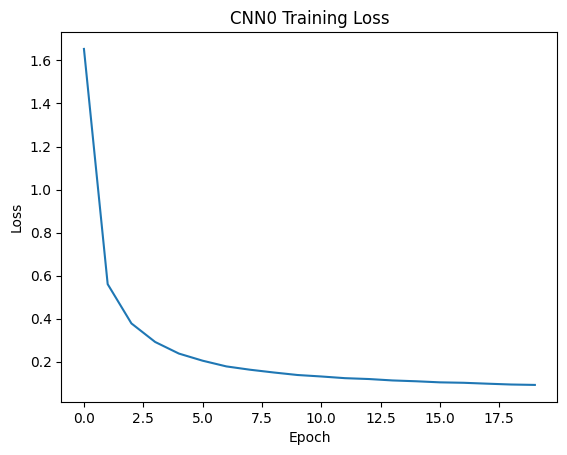

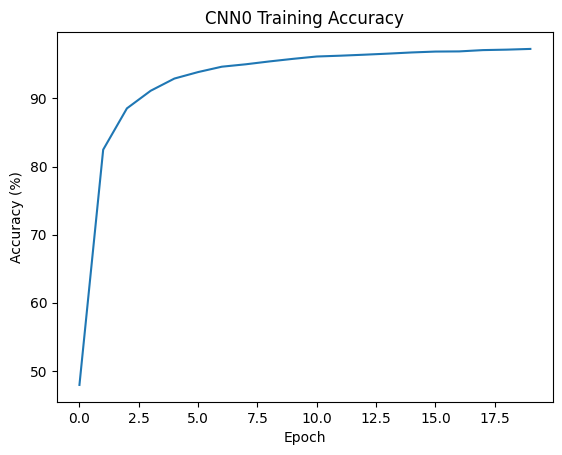

Overall Accuracy: 98.16%
Accuracy of 0: 99.18%
Accuracy of 1: 98.85%
Accuracy of 2: 98.55%
Accuracy of 3: 97.82%
Accuracy of 4: 97.96%
Accuracy of 5: 98.43%
Accuracy of 6: 99.16%
Accuracy of 7: 97.47%
Accuracy of 8: 97.95%
Accuracy of 9: 96.23%


In [90]:
cnn0 = CNN0()
optimizer = torch.optim.Adam(cnn0.parameters(), lr=0.0005, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

print(f'Total parameters in CNN0: {count_parameters(cnn0)}')
losses1, accuracies1 = train_cnn(cnn0, 20, train_loader, optimizer, criterion)

plt.plot(losses1)
plt.title('CNN0 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracies1)
plt.title('CNN0 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

cnn1_test_acc = test_cnn(cnn0, test_loader)

Total parameters in CNN1: 25570
Epoch [1/20], Loss: 1.7887, Accuracy: 36.18%
Epoch [2/20], Loss: 0.5835, Accuracy: 81.37%
Epoch [3/20], Loss: 0.4051, Accuracy: 87.50%
Epoch [4/20], Loss: 0.3238, Accuracy: 90.20%
Epoch [5/20], Loss: 0.2676, Accuracy: 91.94%
Epoch [6/20], Loss: 0.2245, Accuracy: 93.21%
Epoch [7/20], Loss: 0.1942, Accuracy: 94.19%
Epoch [8/20], Loss: 0.1710, Accuracy: 94.88%
Epoch [9/20], Loss: 0.1560, Accuracy: 95.25%
Epoch [10/20], Loss: 0.1406, Accuracy: 95.77%
Epoch [11/20], Loss: 0.1335, Accuracy: 95.92%
Epoch [12/20], Loss: 0.1257, Accuracy: 96.19%
Epoch [13/20], Loss: 0.1152, Accuracy: 96.48%
Epoch [14/20], Loss: 0.1093, Accuracy: 96.68%
Epoch [15/20], Loss: 0.1060, Accuracy: 96.73%
Epoch [16/20], Loss: 0.0999, Accuracy: 96.97%
Epoch [17/20], Loss: 0.0952, Accuracy: 97.14%
Epoch [18/20], Loss: 0.0945, Accuracy: 97.14%
Epoch [19/20], Loss: 0.0897, Accuracy: 97.29%
Epoch [20/20], Loss: 0.0858, Accuracy: 97.39%


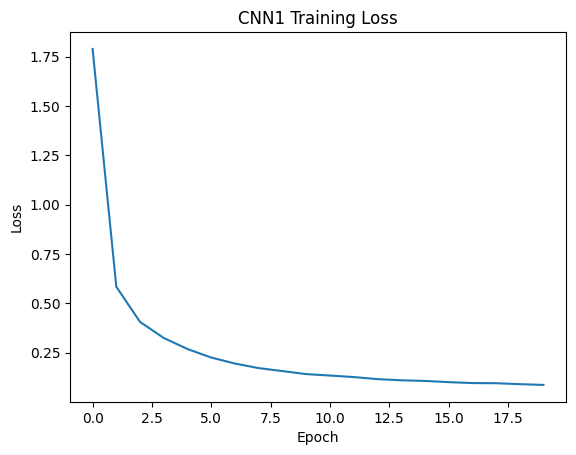

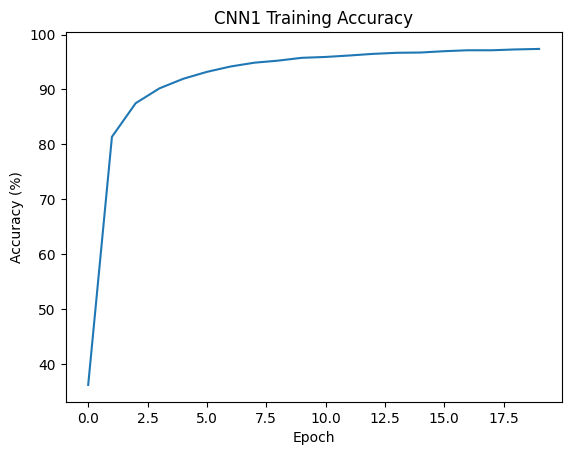

Overall Accuracy: 97.58%
Accuracy of 0: 98.47%
Accuracy of 1: 98.41%
Accuracy of 2: 97.29%
Accuracy of 3: 97.23%
Accuracy of 4: 98.68%
Accuracy of 5: 97.87%
Accuracy of 6: 97.81%
Accuracy of 7: 96.79%
Accuracy of 8: 98.05%
Accuracy of 9: 95.24%


In [91]:
cnn1 = CNN1()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=0.0005, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

print(f'Total parameters in CNN1: {count_parameters(cnn1)}')
losses2, accuracies2 = train_cnn(cnn1, 20, train_loader, optimizer, criterion)

plt.plot(losses2)
plt.title('CNN1 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracies2)
plt.title('CNN1 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

cnn2_test_acc = test_cnn(cnn1, test_loader)

Total parameters in CNN3: 25621
Epoch [1/20], Loss: 1.3059, Accuracy: 66.43%
Epoch [2/20], Loss: 0.3314, Accuracy: 90.28%
Epoch [3/20], Loss: 0.2280, Accuracy: 93.22%
Epoch [4/20], Loss: 0.1770, Accuracy: 94.76%
Epoch [5/20], Loss: 0.1453, Accuracy: 95.69%
Epoch [6/20], Loss: 0.1252, Accuracy: 96.28%
Epoch [7/20], Loss: 0.1096, Accuracy: 96.72%
Epoch [8/20], Loss: 0.0995, Accuracy: 97.05%
Epoch [9/20], Loss: 0.0907, Accuracy: 97.30%
Epoch [10/20], Loss: 0.0834, Accuracy: 97.52%
Epoch [11/20], Loss: 0.0763, Accuracy: 97.72%
Epoch [12/20], Loss: 0.0725, Accuracy: 97.82%
Epoch [13/20], Loss: 0.0677, Accuracy: 98.00%
Epoch [14/20], Loss: 0.0650, Accuracy: 98.03%
Epoch [15/20], Loss: 0.0604, Accuracy: 98.23%
Epoch [16/20], Loss: 0.0584, Accuracy: 98.25%
Epoch [17/20], Loss: 0.0560, Accuracy: 98.31%
Epoch [18/20], Loss: 0.0537, Accuracy: 98.36%
Epoch [19/20], Loss: 0.0505, Accuracy: 98.50%
Epoch [20/20], Loss: 0.0498, Accuracy: 98.53%


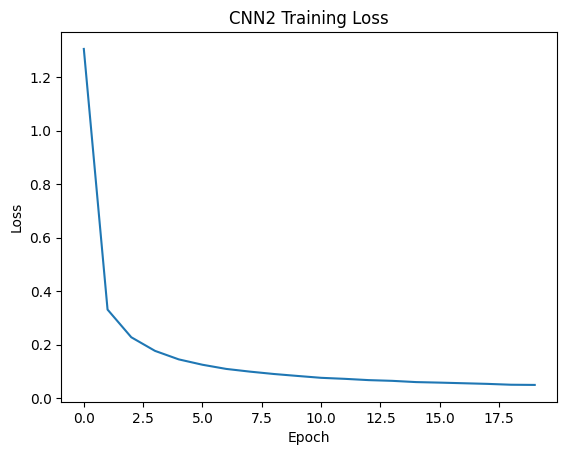

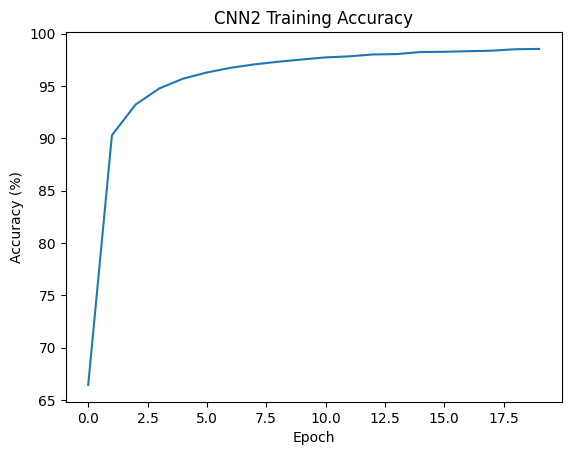

Overall Accuracy: 98.51%
Accuracy of 0: 99.39%
Accuracy of 1: 99.21%
Accuracy of 2: 98.84%
Accuracy of 3: 99.21%
Accuracy of 4: 98.78%
Accuracy of 5: 98.65%
Accuracy of 6: 97.91%
Accuracy of 7: 98.05%
Accuracy of 8: 97.74%
Accuracy of 9: 97.22%


In [92]:
cnn2 = CNN2()
optimizer = torch.optim.Adam(cnn2.parameters(), lr=0.0005, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

print(f'Total parameters in CNN3: {count_parameters(cnn2)}')
losses3, accuracies3 = train_cnn(cnn2, 20, train_loader, optimizer, criterion)

plt.plot(losses3)
plt.title('CNN2 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracies3)
plt.title('CNN2 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

cnn3_test_acc = test_cnn(cnn2, test_loader)

CNN0 Test Accuracy: 98.16%
CNN1 Test Accuracy: 97.58%
CNN2 Test Accuracy: 98.51%


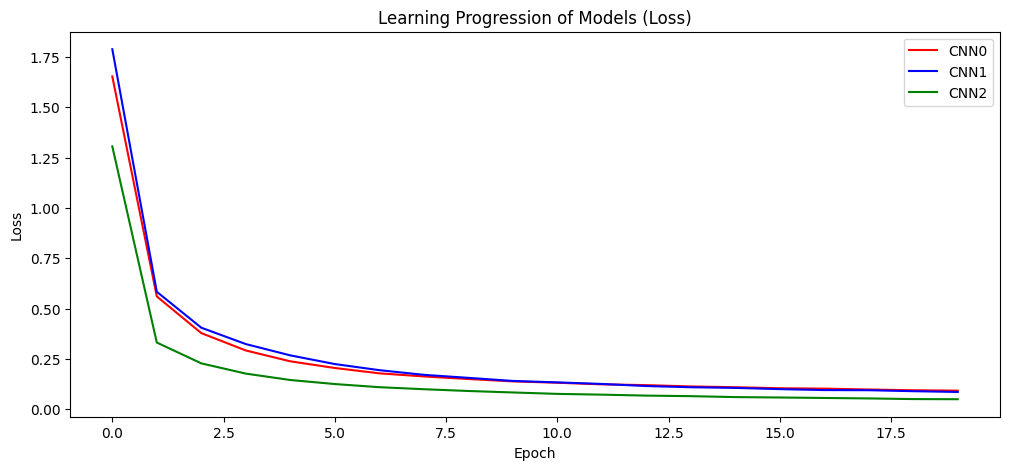

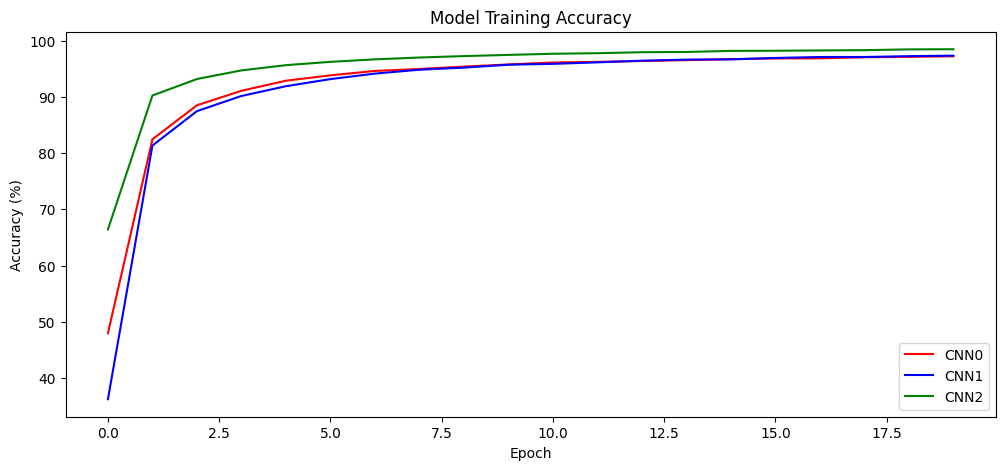

In [93]:

print(f'CNN0 Test Accuracy: {cnn1_test_acc:.2f}%')
print(f'CNN1 Test Accuracy: {cnn2_test_acc:.2f}%')
print(f'CNN2 Test Accuracy: {cnn3_test_acc:.2f}%')

plt.figure(figsize=(12, 5))
plt.plot(losses1, color="red", label="CNN0")
plt.plot(losses2, color="blue", label="CNN1")
plt.plot(losses3, color="green", label="CNN2")
plt.title('Learning Progression of Models (Loss)')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(OUTPUT_PATH + 'CNN_Loss_Comparison.pdf')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(accuracies1, color="red", label="CNN0")
plt.plot(accuracies2, color="blue", label="CNN1")
plt.plot(accuracies3, color="green", label="CNN2")
plt.title('Model Training Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.savefig(OUTPUT_PATH + 'CNN_Accuracy_Comparison.pdf')
plt.show()